In [1]:
def cv2_imshow(img):
    cv2.imshow('', img)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
def imshow_plt(img):
    plt.figure(figsize=(15,15))
    if len(img.shape)==2:
        img = np.expand_dims(img, axis=-1)
    plt.imshow(img[:,:,0], cmap='gray')
    plt.show()

1588154_X3L
**Rotate**
c1_rotate : (254, 386), c2 : (254, 326)


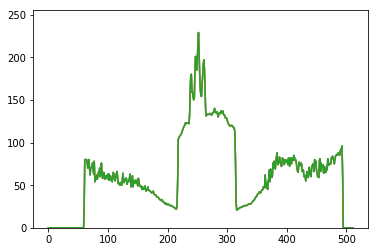

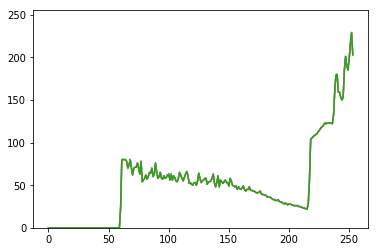

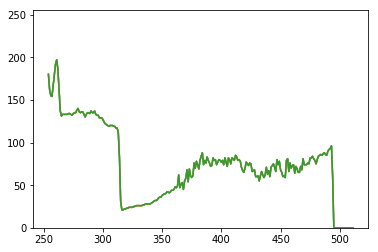

left_increment_cnt:  2
right_increment_cnt:  5
p1 :  (240, 261)
LR: 0, hands_cv: 0
(282, 261)
p2 :  (276, 270)
volar_side_point :  (240, 261)
dosal_side_point :  (276, 270)
angle :  -14.04


In [18]:
import cv2
import numpy as np
import glob
import pandas as pd
from angle_LAT import *
import matplotlib.pyplot as plt

pred_files = glob.glob('./4_result/exp1/result/LAT/exp1_img/*.png')
post_files = glob.glob('./4_result/exp1/result/LAT/exp1_postprocessing/*.png')
img_ori_li = glob.glob('./3_deepdata/1_exp1/test/LAT_pre_img/*.png')
names = np.load('./3_deepdata/1_exp1/npy/LAT/test_name.npy')
angles = []

# df_hand = pd.read_excel('./5_angle/hand.xlsx')
# hands = df_hand['hand'].tolist()

# i=80
for i in range(len(post_files)):
    if i==1:
        break
    i=3
#     print(names[i])
    img_w, img_h = 1024,1024
    center_x = int(img_w / 2.0)
    center_y = int(img_h / 2.0)
    thickness = 1
    font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX  # hand-writing style font
    fontScale = 0.5
    #for i in range(93):
    print(names[i])
    img = cv2.imread(post_files[i])
#     hand = hands[i]
    _, contour = max_contour(img)
    
    x_list, y_list, center_x, center_x2, errorcode1 = find_center_point(contour)
#     print('c1 : {}, c2 : {}'.format(center_x, center_x2))
    
    ######################################################
    #################### Rotate image ####################
    ######################################################
    
    c_angle = getAngle((center_x[0], center_x2[1]), center_x, center_x2)
    c_angle = 360-c_angle if c_angle>180 else c_angle
    if center_x[0]<center_x2[0]:
        if c_angle>0:
            c_angle = -c_angle
            
    step1 = img.copy()
    cv2.line(step1, center_x, center_x, (0,255,0),2, cv2.LINE_AA)
    cv2.line(step1, center_x2, center_x2, (0,255,0), 2, cv2.LINE_AA)
    cv2.imwrite('./5_angle/process_LAT/step0.png', step1)
    cv2.line(step1, center_x, center_x2, (0,0,255), 1, cv2.LINE_AA)
    cv2.line(step1, (center_x[0], center_x[1]+20), (center_x[0], center_x2[1]-20), (255,0,0), 1, cv2.LINE_AA)
    cv2.imwrite('./5_angle/process_LAT/step1.png', step1)
    
    print('**Rotate**')
    c_angle = getAngle((center_x[0], center_x2[1]), center_x, center_x2)
    img = rotate(img, c_angle)
    _, contour = max_contour(img)
        
    img_ori = cv2.imread(img_ori_li[i])
    img_ori = cv2.resize(img_ori, (512,512))
    img_ori = rotate(img_ori, c_angle)
    
    x_list, y_list, center_x, center_x2 = find_rotate_center_point(contour, errorcode1)
    print('c1_rotate : {}, c2 : {}'.format(center_x, center_x2))
    
    step2 = img.copy()
    cv2.line(step2, center_x, center_x2, (0,255,200), 1, cv2.LINE_AA)
    cv2.line(step2, center_x, center_x, (0,255,0),2, cv2.LINE_AA)
    cv2.line(step2, center_x2, center_x2, (0,255,0), 2, cv2.LINE_AA)
    cv2.imwrite('./5_angle/process_LAT/step2.png', step2)
    
# #     print(hands[i])
#     x = np.array(range(len(img)))
#     plt.ylim([0,255])
#     plt.plot(x[0:512], img_ori[center_x[1]][0:512])
#     plt.show()
    
#     #왼쪽 방향
#     plt.ylim([0,255])
#     plt.plot(x[0:center_x[0]], img_ori[center_x[1]][0:center_x[0]])
#     plt.show()
    
#         #오른쪽 방향
#     plt.ylim([0,255])
#     plt.plot(x[center_x[0]:], img_ori[center_x[1]][center_x[0]:])
#     plt.show()
    
#     left_increment_cnt = 0
#     for m in range(center_x[0], center_x[0]-150, -5):
# #         print(img_ori[center_x[1]][m])
        
#         if m==center_x[0]:
#             pre_value = img_ori[center_x[1]+30][m][0]
#         else:
#             if pre_value<img_ori[center_x[1]+30][m][0] and img_ori[center_x[1]+30][m][0]>80:
#                 left_increment_cnt+=1
            
#             pre_value = img_ori[center_x[1]+30][m][0]
#     print('left_increment_cnt: ', left_increment_cnt)

    
#     right_increment_cnt = 0
#     for m in range(center_x[0], center_x[0]+150, 5):
# #         print(img_ori[center_x[1]][m])
        
#         if m==center_x[0]:
#             pre_value = img_ori[center_x[1]+30][m][0]
#         else:
#             if pre_value<img_ori[center_x[1]+30][m][0] and img_ori[center_x[1]+30][m][0]>80:
#                 right_increment_cnt+=1
            
#             pre_value = img_ori[center_x[1]+30][m][0]
#     print('right_increment_cnt: ', right_increment_cnt)
        
#     if left_increment_cnt>right_increment_cnt:
#         hands_cv = 1
#     else:
#         hands_cv = 0
    
    ##############################################+########
    
    point_1 = find_ymax_point(contour)
    print('p1 : ', point_1)

    step3 = img.copy()
    cv2.line(step3, point_1, point_1, (0,0,255),3, cv2.LINE_AA)
    cv2.imwrite('./5_angle/process_LAT/step3.png', step3)
    
    LR=left_right(point_1,center_x)
    print('LR: {}, hands_cv: {}'.format(LR, hands_cv))
    
    point_2, std_point = find_xpoint2_v2(img,contour,point_1,LR)
    print('p2 : ', point_2)
    
    step4 = img.copy()
    cv2.line(step4, std_point, std_point, (0,255,255), 2, cv2.LINE_AA)
    cv2.line(step4, point_2, point_2, (255,0,0), 3, cv2.LINE_AA)
    cv2.imwrite('./5_angle/process_LAT/step4.png', step4)
    
    step4_1 = img.copy()
    cv2.line(step4_1, point_1, point_1, (0,0,255),3, cv2.LINE_AA)
    cv2.line(step4_1, point_2, point_2, (255,0,0), 3, cv2.LINE_AA)
    cv2.imwrite('./5_angle/process_LAT/step4_1.png', step4_1)
    
    if hands_cv==1:
        if point_1[0]<point_2[0]:
            volar_side_point =  point_1
            dosal_side_point = point_2
        else:
            print('ee')
            volar_side_point =  point_2
            dosal_side_point = point_1
    else:
        if point_1[0]<point_2[0]:
            volar_side_point =  point_1
            dosal_side_point = point_2
        else:
            print('aa')
            volar_side_point =  point_2
            dosal_side_point = point_1
    
    print('volar_side_point : ', volar_side_point)    
    print('dosal_side_point : ', dosal_side_point)    
    
    step6 = img.copy()
    cv2.putText(step6, 'dorsal point', (50,30), 0, fontScale, (255, 0,0), 1)
    cv2.putText(step6, 'volar point', (50,50), 0, fontScale, (0, 0,255), 1)
    cv2.line(step6, dosal_side_point, dosal_side_point, (0,0,255), 3, cv2.LINE_AA)
    cv2.line(step6, volar_side_point, volar_side_point, (255,0,0), 3, cv2.LINE_AA)
    cv2.imwrite('./5_angle/process_LAT/step6.png', step6)
    
    D = (dosal_side_point[0], volar_side_point[1])
    angle = getAngle(dosal_side_point, volar_side_point, D)
    if angle>180:
        angle = 360-angle
    if dosal_side_point[1]>volar_side_point[1]:
        angle = -angle
    
#     angle = -(360+angle)
    location=(volar_side_point[0]-30, volar_side_point[1]-10)

    angle = round(angle, 2)
    angles.append((names[i],angle))
    print('angle : ', angle)
    
#     img = cv2.imread(post_files[i])
#     img = rotate(img, c_angle)
#     image[img==255] = 255
    image = cv2.putText(img_ori, str(angle), location, font, fontScale, (255, 255,0), thickness)
    image = cv2.putText(img_ori, 'dorsal point', (50,30), 0, fontScale, (0, 0,255), 1)
    image = cv2.putText(img_ori, 'volar point', (50,50), 0, fontScale, (255, 0,0), 1)
    
    image = cv2.line(img_ori, center_x, center_x, (0,255,0),2, cv2.LINE_AA)
#     image = cv2.line(img_ori, (center_x[0], center_x[1]+30), (center_x[0], center_x[1]+30), (0,0,255),2, cv2.LINE_AA)
    
    image = cv2.line(img_ori, center_x2, center_x2, (0,255,0), 2, cv2.LINE_AA)
    image = cv2.line(img_ori, center_x, center_x2, (200,2255,0), 1, cv2.LINE_AA)
    
    image = cv2.line(img_ori, volar_side_point, dosal_side_point, (255,200,0), 1, cv2.LINE_AA)
    image = cv2.line(img_ori, volar_side_point, D, (200,255,0), 1, cv2.LINE_AA)
    
    image = cv2.line(img_ori, volar_side_point, volar_side_point, (0,0,255), 2, cv2.LINE_AA)
    image = cv2.line(img_ori, dosal_side_point, dosal_side_point, (255,0,0), 2, cv2.LINE_AA)
#     image = cv2.line(img_ori, std_point, std_point, (0,255,0), 2, cv2.LINE_AA)
    image = cv2.line(img_ori, D, D, (0,255,0), 2, cv2.LINE_AA)
    
#     image = cv2.line(img_ori, point_1, point_1, (255,255,0), 2)
    #print(angle)
    #cv2.imwrite('D:\\Distal_radius\\roi\\test_angle\\'+ str(num).zfill(3) + '.png', image)
    image = array_to_img(image)
    image.save('./5_angle/process_LAT/step7.png')
    image.save("./5_angle/imgs_angle_LAT_v2/angle_{}.png".format(names[i]))

In [2]:
import pandas as pd

df2 = pd.read_excel('./5_angle/GT.xlsx')
gt_li = df2['LAT_GT'].tolist()

tmp =[]
for i in gt_li:
    
    if i>90:
        j=i-90
    elif i<90:
        j=90-i
#     print(i, round(j,2))
    tmp.append(round(j,2))
    
df = pd.DataFrame(angles, columns=['names', 'angle'])
# df2 = pd.read_excel('./test_ro.xlsx')
df['gt']=tmp
# df['ai_p']=tmp2
df.to_excel('./5_angle/imgs_angle_LAT_v2.xlsx')
